# Borrowers reliability research

This project contains borrowers' reliability research. The customer is the bank credit department. In the project, the author explores the influence of the marital status and the number of children of the client on repaying the loan on time. The input data from the bank contains statistics on the solvency of customers.

The research results were taken into account when building a **credit scoring model** (a special system that evaluates the ability of a potential borrower to repay a loan to a bank).

**The purpose of the research** is to provide answers to the following questions:
 * Is there a relationship between having children and repaying a loan on time?
 * Is there a relationship between marital status and loan repayment on time?
 * Is there a relationship between income level and loan repayment on time?
 * How do different purposes of a loan affect its repayment on time?


***
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов. 

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Цель исследования** - дать ответы на следующие вопросы:
 * Есть ли зависимость между наличием детей и возвратом кредита в срок?
 * Есть ли зависимость между семейным положением и возвратом кредита в срок?
 * Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
 * Как разные цели кредита влияют на его возврат в срок?

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
from pymystem3 import Mystem
from nltk.stem import SnowballStemmer 
from collections import Counter

In [2]:
clients = pd.read_csv('/datasets/data.csv')

In [3]:
clients.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [4]:
clients.tail(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21515,1,-467.685130,28,среднее,1,женат / замужем,0,F,сотрудник,1,109486.327999,заняться образованием
21516,0,-914.391429,42,высшее,0,женат / замужем,0,F,компаньон,0,322807.776603,покупка своего жилья
21517,0,-404.679034,42,высшее,0,гражданский брак,1,F,компаньон,0,178059.553491,на покупку своего автомобиля
21518,0,373995.710838,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем
21519,1,-2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


In [5]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Итак, в таблице 12 столбцов. Присутствуют следующие типы данных:
   * int64 (столбцы children, dob_years, education_id, family_status_id, debt)
   * float (столбцы days_employed, total_income), можно перевести в int, так как нам не нужна такая точность по этим показателям
   * object (столбцы education, family_status, gender, income_type, purpose)

Переименуем некоторые столбцы. 

In [6]:
clients = clients.rename(columns={'dob_years':'age', 'income_type':'type', 'total_income':'monthly_income'})
clients.head()

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,type,debt,monthly_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Описание данных:
 * children — количество детей в семье
 * days_employed — общий трудовой стаж в днях
 * age (dob_years) — возраст клиента в годах
 * education — уровень образования клиента
 * education_id — идентификатор уровня образования
 * family_status — семейное положение
 * family_status_id — идентификатор семейного положения
 * gender — пол клиента
 * type (income_type) — тип занятости
 * debt — имел ли задолженность по возврату кредитов
 * monthly_income (total_income) — ежемесячный доход
 * purpose — цель получения кредита

К категориальным данным можно отнести уровень образования (и идентификатор), семейный статус (и иднтификатор), тип занятости.
К количественным данным можно отнести общий трудовой стаж в днях, ежемесячный доход).

Всего в таблице 21 525 записей, этого должно быть достаточно, чтобы сделать выводы по данным и найти ответы на поставленные вопросы. Также можно отметить, что колонки days_employed, monthly_income содержат меньше данных (19351) - ожидаются пропущенные значения. Столбец "общий трудовой стаж в днях" имеет иногда отрицательные значения.

In [7]:
clients.describe()

,children,days_employed,age,education_id,family_status_id,debt,monthly_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Можно сделать следующие наблюдения:
 * в столбце children есть странное значение -1, а также максимальное значение 20 (это возможное, но редкое значение, - нужно проверить, насколько часто оно встречается);
 * в столбце days_employed есть отрицательные значения - возможно, они неправильно загрузились, и их следует конвертировать в положительтные; также из-за отрицательных значений в этом столбце получаем ошибки в подсчете статистических показателей: отрицательное значение квартилей; среднее значение имеет значение 63 046 дней (63 046/ 365 = 172 дня, это заведемо ошибочное значение)
 * также странное значение - минимальное значение по столбцу "возраст" (dob_years), которое равно 0.

**Вывод**

Каждая строка таблицы содержит сведения о клиенте, такие как количество детей, общий трудовой стаж, возраст, уровень образования, семейное положение, пол и др. Некоторые столбцы имеют дополнтельный идентификатор (например, идентификатор уровня образования, идентификатор семейного положения). Для ответа на вопросы по поводу возврата кредита в срок важное значение имеет столбец "debt — имел ли задолженность по возврату кредитов". 

Датасет имеет более 20 тыс. записей, что достаточно для поиска ответов на вопросы. При этом, некоторые столбцы имеют пропущенные значения. Также предварительно можно сказать, что заполнение столбца "уровень образования" оставляет желать лучшего (отличается регистр).

## Шаг 2. Предобработка данных

### Обработка пропусков

Было обнаружено, что пропуски встречаются в столбцах ***days_employed*** и ***monthly income***, при этом количество пропусков одинаковое для двух столбцов *(21525 - 19351 = 2174)*. Гипотеза состоит в том, что пропуски встречаются в одних и те же строках, проверим ее.

In [8]:
clients.isnull().sum()

children               0
days_employed       2174
age                    0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
type                   0
debt                   0
monthly_income      2174
purpose                0
dtype: int64

In [9]:
clients['monthly_income'].isnull().sum()

2174

In [10]:
clients[(clients['days_employed'].isnull() == True) & (clients['monthly_income'].isnull() == True)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
children            2174 non-null int64
days_employed       0 non-null float64
age                 2174 non-null int64
education           2174 non-null object
education_id        2174 non-null int64
family_status       2174 non-null object
family_status_id    2174 non-null int64
gender              2174 non-null object
type                2174 non-null object
debt                2174 non-null int64
monthly_income      0 non-null float64
purpose             2174 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 220.8+ KB


Можно сделать вывод, что гипотеза подтверждается, пропуски столбцов ***days_employed*** и ***total_income*** действительно встречаются в одних и тех же строках.

Далее, для того, чтобы принять решение, как именно запонять пропуски, проверим тип занятости (**type**) по клиентам, у которых пропущены значения по указанным столбцам.

In [11]:
clients[(clients['monthly_income'].isnull() == True) & (clients['days_employed'].isnull() == True)]['type'].value_counts()

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: type, dtype: int64

Итак, тип занятости не совпадает, поэтому заполним пропущенные значения медианным значением по каждому типу занятости. Далее найдем медианные значения.

In [12]:
medians_monthly_income = clients.groupby('type')['monthly_income'].median()

In [13]:
round(medians_monthly_income)

type
безработный        131340.0
в декрете           53829.0
госслужащий        150448.0
компаньон          172358.0
пенсионер          118514.0
предприниматель    499163.0
сотрудник          142594.0
студент             98202.0
Name: monthly_income, dtype: float64

Заменим пропущенные значения.

In [14]:
clients.loc[(clients['monthly_income'].isnull()) & (clients['type'] == 'госслужащий'), 'monthly_income'] = medians_monthly_income[2]
clients.loc[(clients['monthly_income'].isnull()) & (clients['type'] == 'компаньон'), 'monthly_income'] = medians_monthly_income[3]
clients.loc[(clients['monthly_income'].isnull()) & (clients['type'] == 'пенсионер'), 'monthly_income'] = medians_monthly_income[4]
clients.loc[(clients['monthly_income'].isnull()) & (clients['type'] == 'предприниматель'), 'monthly_income'] = medians_monthly_income[5]
clients.loc[(clients['monthly_income'].isnull()) & (clients['type'] == 'сотрудник'), 'monthly_income'] = medians_monthly_income[6]

In [15]:
clients.head(10)

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,type,debt,monthly_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [16]:
clients.isnull().sum()

children               0
days_employed       2174
age                    0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
type                   0
debt                   0
monthly_income         0
purpose                0
dtype: int64

Итак, пропущенные значения в столбце monthly_income заполнены медианными значениями по типу занятости.

Далее следует решить проблему с отрицательным стажем (days_employed). Предположительно, данные о стаже хранились с отрицательным значением, поэтому применим метод abs.

In [17]:
clients[['days_employed']] = clients[['days_employed']].abs()

In [18]:
clients.describe()

,children,days_employed,age,education_id,family_status_id,debt,monthly_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,2.152500e+04
mean,0.538908,66914.728907,43.293380,0.817236,0.972544,0.080883,1.652253e+05
std,1.381587,139030.880527,12.574584,0.548138,1.420324,0.272661,9.804367e+04
min,-1.000000,24.141633,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,927.009265,33.000000,1.000000,0.000000,0.000000,1.077982e+05
50%,0.000000,2194.220567,42.000000,1.000000,0.000000,0.000000,1.425944e+05
75%,1.000000,5537.882441,53.000000,1.000000,1.000000,0.000000,1.955499e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [19]:
medians_days_employed = clients.groupby('type')['days_employed'].median()

In [20]:
round(medians_days_employed)

type
безработный        366414.0
в декрете            3297.0
госслужащий          2689.0
компаньон            1547.0
пенсионер          365213.0
предприниматель       521.0
сотрудник            1574.0
студент               579.0
Name: days_employed, dtype: float64

In [21]:
clients.loc[(
    clients['days_employed'].isnull()) & (clients['type'] == 'сотрудник'), 'days_employed'] = medians_days_employed[6]
clients.loc[(clients['days_employed'].isnull()) & (clients['type'] == 'компаньон'), 'days_employed'] = medians_days_employed[3]
clients.loc[(clients['days_employed'].isnull()) & (clients['type'] == 'пенсионер'), 'days_employed'] = medians_days_employed[4]
clients.loc[(clients['days_employed'].isnull()) & (clients['type'] == 'госслужащий'), 'days_employed'] = medians_days_employed[2]
clients.loc[(clients['days_employed'].isnull()) & (clients['type'] == 'предприниматель'), 'days_employed'] = medians_days_employed[5]

In [22]:
clients.describe()

,children,days_employed,age,education_id,family_status_id,debt,monthly_income
count,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,2.152500e+04
mean,0.538908,67299.486032,43.293380,0.817236,0.972544,0.080883,1.652253e+05
std,1.381587,139401.804684,12.574584,0.548138,1.420324,0.272661,9.804367e+04
min,-1.000000,24.141633,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,1025.549623,33.000000,1.000000,0.000000,0.000000,1.077982e+05
50%,0.000000,1993.522017,42.000000,1.000000,0.000000,0.000000,1.425944e+05
75%,1.000000,5347.024506,53.000000,1.000000,1.000000,0.000000,1.955499e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [23]:
clients.isnull().sum()

children            0
days_employed       0
age                 0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
type                0
debt                0
monthly_income      0
purpose             0
dtype: int64

Итак, пропущенные значения все заменены медианными.

Далее приведем к нижнему регистру значения в некоторых столбцах.

In [24]:
clients['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [25]:
clients['education'] = clients['education'].str.lower()

In [26]:
clients['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [27]:
clients['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [28]:
clients['family_status'] = clients['family_status'].str.lower()

In [29]:
clients['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'не женат / не замужем'], dtype=object)

Дальше рассмотрим аномальные значения в столбце с количеством детей.

In [30]:
clients['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [31]:
clients['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Заменим значение "-1" на "1", предположив, что это либо опечатка, либо данные хванились в другом источнике отрицательном виде.

In [32]:
clients['children'] = clients['children'].replace(-1, 1)

Значение "20" могло также появиться в следствие опечатки, например, планировалось ввести значение "2" или "0". Поэтому заменим на среднее значение "1"

In [33]:
clients['children'] = clients['children'].replace(20, 1)

Проверим результат.

In [34]:
clients['children'].value_counts()

0    14149
1     4941
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

Проверим столбец с данными о поле клиентов.

In [35]:
clients['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [36]:
clients['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

Вывод: есть одно непонятное значение XNA, возможно имелось в виду NA, т.е. это пропущенное значение.

Далее проверим данные в столбце "возраст".

In [37]:
clients['age'].describe()

count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: age, dtype: float64

Минимальное значение возраста равно нулю (у 101 клиента), что является аномальным значением. Предлагается заменить эти данные на средний возраст по типу занятости.

In [38]:
clients[clients['age'] == 0]

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,type,debt,monthly_income,purpose
99,0,346541.618895,0,среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0,2664.273168,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
270,3,1872.663186,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0,397856.565013,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
1040,0,1158.029561,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль
...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,1574.202821,0,среднее,1,женат / замужем,0,F,сотрудник,0,142594.396847,жилье
20462,0,338734.868540,0,среднее,1,женат / замужем,0,F,пенсионер,0,259193.920299,покупка своего жилья
20577,0,331741.271455,0,среднее,1,не женат / не замужем,4,F,пенсионер,0,129788.762899,недвижимость
21179,2,108.967042,0,высшее,0,женат / замужем,0,M,компаньон,0,240702.007382,строительство жилой недвижимости


In [39]:
medians_age = clients.groupby('type')['age'].median()

In [40]:
round(medians_age)

type
безработный        38.0
в декрете          39.0
госслужащий        40.0
компаньон          39.0
пенсионер          60.0
предприниматель    42.0
сотрудник          39.0
студент            22.0
Name: age, dtype: float64

In [41]:
clients.loc[(clients['age'] == 0) & (clients['type'] == 'госслужащий'), 'age'] = medians_age[2]
clients.loc[(clients['age'] == 0) & (clients['type'] == 'компаньон'), 'age'] = medians_age[3]
clients.loc[(clients['age'] == 0) & (clients['type'] == 'пенсионер'), 'age'] = medians_age[4]
clients.loc[(clients['age'] == 0) & (clients['type'] == 'предприниматель'), 'age'] = medians_age[5]
clients.loc[(clients['age'] == 0) & (clients['type'] == 'сотрудник'), 'age'] = medians_age[6]

Проверим, как произошла замена.

In [42]:
clients['age'].describe()

count    21525.000000
mean        43.496167
std         12.231538
min         19.000000
25%         34.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: age, dtype: float64

Теперь минимальный возраст клиента, обратившегося за кредитом, составляет 19 лет, что выглядит правдоподобным.

**Вывод**
В этом разделе были заменены пропущенные значения в столбцах стаж, ежемесячный доход. Также данные в столбце "образование" приведены к единому регистру. Найдено странное значение в столбце "пол".

### Замена типа данных

Еще раз проверим тип данных в столбцах.

In [43]:
clients.dtypes

children              int64
days_employed       float64
age                 float64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
type                 object
debt                  int64
monthly_income      float64
purpose              object
dtype: object

Столбцы days_employed, monthly_income являются float типом, для сокращения излишней детализации приведем эти данные к типу int.

In [44]:
clients['days_employed'] = clients['days_employed'].astype('int')

In [45]:
clients['monthly_income'] = clients['monthly_income'].astype('int')

In [46]:
clients.dtypes

children              int64
days_employed         int64
age                 float64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
type                 object
debt                  int64
monthly_income        int64
purpose              object
dtype: object

**Вывод**

Тип данных в столбцах days_employed, monthly_income был изменен с float на int для удаления излишней детализации и более удобных расчетов в анализе. Был применен метод astype(), который может изменить тип данных в том числе на int. Метод to_numeric() может изменять тип на float, поэтому он не был использован.

### Обработка дубликатов

Проверим количество дубликатов в датасете.

In [47]:
clients.duplicated().sum()

71

In [48]:
clients[clients.duplicated(keep=False)].sort_values(by=['monthly_income', 'days_employed'])

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,type,debt,monthly_income,purpose
1005,0,365213,62.0,среднее,1,женат / замужем,0,F,пенсионер,0,118514,ремонт жилью
1191,0,365213,61.0,среднее,1,женат / замужем,0,F,пенсионер,0,118514,операции с недвижимостью
1511,0,365213,58.0,высшее,0,не женат / не замужем,4,F,пенсионер,0,118514,дополнительное образование
1681,0,365213,57.0,среднее,1,гражданский брак,1,F,пенсионер,0,118514,на проведение свадьбы
2052,0,365213,58.0,среднее,1,гражданский брак,1,F,пенсионер,0,118514,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
16148,0,1547,45.0,среднее,1,гражданский брак,1,F,компаньон,0,172357,свадьба
17379,0,1547,54.0,высшее,0,женат / замужем,0,M,компаньон,0,172357,операции с коммерческой недвижимостью
17774,1,1547,40.0,среднее,1,гражданский брак,1,F,компаньон,0,172357,строительство жилой недвижимости
19369,0,1547,45.0,среднее,1,гражданский брак,1,F,компаньон,0,172357,свадьба


Данные действительно выглядят как дубликаты, их появление возможно в результате задвоения. Удалим дубликаты.

In [49]:
clients = clients.drop_duplicates()

In [50]:
clients.duplicated().sum()

0

**Вывод**

В этом разделе было найдено 71 шт. дубликатов, которые были удалены из датасета. Был использован метод drop_duplicates(), который позволяет удалить точные дубликаты данных.

### Лемматизация

Столбец "purpose" в датасете содержит сведения о цели кредита, многие строки содержат одинаковые леммы, но разные формулировки, что усложняет анализ данных и затрудняет категоризацию. Поэтому проведем лемматизацию.

Создадим список с уникальными значениями в столбце purpose.

In [51]:
unique_purposes = clients['purpose'].value_counts().index.tolist()

Создадим фрейм с уникальными значениями данных столбца purpose и количество употреблений.

In [52]:
clients['purpose'].value_counts().to_frame()

,purpose
свадьба,791
на проведение свадьбы,768
сыграть свадьбу,765
операции с недвижимостью,675
покупка коммерческой недвижимости,661
операции с жильем,652
покупка жилья для сдачи,651
операции с коммерческой недвижимостью,650
жилье,646
покупка жилья,646


Предварительный анализ показывает, что многие цели совпадают (отличаются лищь формулировки), данные можно свести в более укрупненые группы по целям, например, "образование", "автомобиль", "свадьба", "недвижимость" и т.д.

С помощью специальной библиотеки лемматизируем список значений столбца purpose.

In [53]:
m = Mystem()
list_of_lemmas = []
for element in clients['purpose']:
    lemma = m.lemmatize(element)
    list_of_lemmas.extend(lemma)
    
unique_lemmas = Counter(list_of_lemmas)
sorted(unique_lemmas.items(), key = lambda pair: pair[1], reverse=True)

[(' ', 33570),
 ('\n', 21454),
 ('недвижимость', 6351),
 ('покупка', 5897),
 ('жилье', 4460),
 ('автомобиль', 4306),
 ('образование', 4013),
 ('с', 2918),
 ('операция', 2604),
 ('свадьба', 2324),
 ('свой', 2230),
 ('на', 2222),
 ('строительство', 1878),
 ('высокий', 1374),
 ('получение', 1314),
 ('коммерческий', 1311),
 ('для', 1289),
 ('жилой', 1230),
 ('сделка', 941),
 ('дополнительный', 906),
 ('заниматься', 904),
 ('проведение', 768),
 ('сыграть', 765),
 ('сдача', 651),
 ('семья', 638),
 ('собственный', 635),
 ('со', 627),
 ('ремонт', 607),
 ('подержанный', 486),
 ('подержать', 478),
 ('приобретение', 461),
 ('профильный', 436)]

Для создания финального списка отбросим пробелы, предлоги, специальные символы, оставим слова длиной больше 4 букв. Рассмотрим самые популярные восемь лемм.

In [54]:
final_list_of_purposes = [k for k in sorted(unique_lemmas, key=unique_lemmas.get, reverse=True)
                          if len(k) > 4 if k != ' ' if k != '\n'][0:10]
print(final_list_of_purposes)

['недвижимость', 'покупка', 'жилье', 'автомобиль', 'образование', 'операция', 'свадьба', 'строительство', 'высокий', 'получение']


В полученном списке некоторые слова являются лишними, такие как "операция" (относится к жилью), "строительство" (относится к жилью), "получение" (относится к образованию"), "покупка" (слишком общая формулировка), "высокий"

In [55]:
final_list_of_purposes.remove('получение') 
final_list_of_purposes.remove('покупка') 
final_list_of_purposes.remove('строительство')
final_list_of_purposes.remove('операция')
final_list_of_purposes.remove('высокий')

In [56]:
final_list_of_purposes

['недвижимость', 'жилье', 'автомобиль', 'образование', 'свадьба']

**Вывод**

Итак, в результате лемматизации был составлен список лемм, по которому будем проводить категоризацию данных.

### Категоризация данных

В этом разделе создадим категории для значений столбца purpose, объединив похожие цели в общую категорию. Напишем функцию, которая ищет слова в специально созданном списке final_list_of_purposes. Далее создадим столбец purpose_group, который будет содержать одну из пяти возможных категорий из списка.

In [90]:
def lemmatize(text):
    lemma = m.lemmatize(text)
    for word in final_list_of_purposes:
        if word in lemma:
            return word
    return 'другое'

clients['purpose_group'] = clients['purpose'].apply(lemmatize)

In [91]:
clients.head(15)

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,type,debt,monthly_income,purpose,purpose_group,children_group,income_group
0,1,8437,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,жилье,имеющий 1-2 ребенка,очень высокий доход
1,1,4024,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,имеющий 1-2 ребенка,средний доход
2,0,5623,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,жилье,нет детей,высокий доход
3,3,4124,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,многодетный,очень высокий доход
4,0,340266,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,нет детей,высокий доход
5,0,926,27.0,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,жилье,нет детей,очень высокий доход
6,0,2879,43.0,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,жилье,нет детей,очень высокий доход
7,0,152,50.0,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,образование,нет детей,средний доход
8,2,6929,35.0,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,свадьба,имеющий 1-2 ребенка,низкий доход
9,0,2188,41.0,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,жилье,нет детей,высокий доход


In [92]:
clients['purpose_group'].value_counts()

недвижимость    6351
жилье           4460
автомобиль      4306
образование     4013
свадьба         2324
Name: purpose_group, dtype: int64

Был создан новый столбец в таблице, который содержит категорию цели кредита (всего пять категорий).

Далее проверим, совпадают ли пары в столбцах образование / индикатор образования.

In [60]:
clients.groupby(['education', 'education_id']).size().to_frame('count').reset_index()

,education,education_id,count
0,высшее,0,5250
1,начальное,3,282
2,неоконченное высшее,2,744
3,среднее,1,15172
4,ученая степень,4,6


Можно сделать вывод, что пары уникальны, распределение в столбцах 'education', 'education_id' корректное.

Теперь проделаем ту же работу со столбцами семейное положение и идентификатор семейного положения.

In [61]:
clients.groupby(['family_status', 'family_status_id']).size().to_frame('count').reset_index()

,family_status,family_status_id,count
0,в разводе,3,1195
1,вдовец / вдова,2,959
2,гражданский брак,1,4151
3,женат / замужем,0,12339
4,не женат / не замужем,4,2810


Такой же вывод для столбцов family_status', 'family_status_id' - совоставление семейного положения и идентификатора корректно.

Проведем категоризацию данных по количеству детей. В датасете есть значения от 0 до 5 детей, создадим три группы:
 * бездетные
 * имеющие 1-2 ребенка
 * многодетные (3 и больше детей)

In [62]:
clients['children'].value_counts()

0    14091
1     4931
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

In [63]:
def number_of_children_group(row):
    if row['children'] == 0:
        return 'нет детей'
    elif row['children'] == 1 or row['children'] == 2:
        return 'имеющий 1-2 ребенка'
    else:
        return 'многодетный'

In [64]:
clients['children_group'] = clients.apply(number_of_children_group, axis=1)

Разделим на категории также данные по ежемесячному доходу. Так как мы не знаем критериев, точкой опоры будем считать статистические квантили. В качестве границ для категоризации доходов были использованы квантили (25%, 50% и 75%).

In [65]:
monthly_income_described = clients['monthly_income'].describe()

In [66]:
monthly_income_described[4:7]

25%    107623.00
50%    142594.00
75%    195820.25
Name: monthly_income, dtype: float64

In [67]:
def determine_income_group(income):
    if income <= monthly_income_described[4]: return 'низкий доход'
    elif monthly_income_described[4] < income <= monthly_income_described[5]: return 'средний доход'
    elif monthly_income_described[5] < income <= monthly_income_described[6]: return 'высокий доход'
    else: return 'очень высокий доход'

In [68]:
clients['income_group'] = clients['monthly_income'].apply(determine_income_group)

In [69]:
clients.head(10)

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,type,debt,monthly_income,purpose,purpose_group,children_group,income_group
0,1,8437,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,жилье,имеющий 1-2 ребенка,очень высокий доход
1,1,4024,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,имеющий 1-2 ребенка,средний доход
2,0,5623,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,жилье,нет детей,высокий доход
3,3,4124,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,многодетный,очень высокий доход
4,0,340266,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,нет детей,высокий доход
5,0,926,27.0,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,жилье,нет детей,очень высокий доход
6,0,2879,43.0,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,жилье,нет детей,очень высокий доход
7,0,152,50.0,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,образование,нет детей,средний доход
8,2,6929,35.0,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,свадьба,имеющий 1-2 ребенка,низкий доход
9,0,2188,41.0,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,жилье,нет детей,высокий доход


In [70]:
clients['income_group'].value_counts()

средний доход          5479
низкий доход           5364
очень высокий доход    5364
высокий доход          5247
Name: income_group, dtype: int64

Итак, категоризация по  доходам позволила сгруппировать клиентов банка на следующие четыре категории:
 * доход до 107,6 тыс. руб. имеет 5364 клиентов,
 * доход от 107,6 до 142,6 тыс.руб. имеет 5479 клиентов,
 * доход 5247 человек находится в диапазоне от 142,6 до 195,8 тыс. рублей
 * наконец, 5364 человек зарабатывают больше 195,8 тыс. рублей

**Вывод**

Итак, здесь была проведена категоризация по цели получения кредита, по ежемесячному доходу, по количеству детей. Эти параметры будут рассматриваться при получении ответов на вопросы исследования в следующем пункте.

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

Для определения зависимости между той или иной категорией и возвратом кредита (столбец debt) напишем функцию dependence(category).

In [71]:
def dependence(category):
    return clients.groupby(category)['debt'].mean().to_frame().sort_values(by='debt')

Применим функцию для столбца children_group, который содержит сведения о наличии детей.

In [72]:
dependence_children_group = dependence('children_group')
dependence_children_group

,debt
children_group,
нет детей,0.075438
многодетный,0.081579
имеющий 1-2 ребенка,0.092654


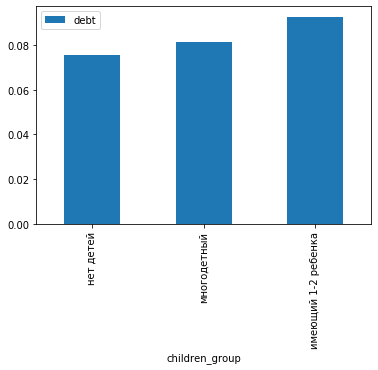

In [73]:
dependence_children_group.plot(kind='bar')

Можно сделать вывод, что самый низкий риск невозврата кредита у группы клиентов, у которых нет детей. Самый высокий риск среди клиентов, у которых 1-2 детей, многодетные клиенты имеют средний риск невозврата кредита.

Далее применим метод pivot_table(), чтобы рассмотреть данные более детально.

In [74]:
pivot_children_family_status = clients.pivot_table(index=['children_group'], columns= 'family_status', values='debt', aggfunc='mean')
pivot_children_family_status

family_status,в разводе,вдовец / вдова,гражданский брак,женат / замужем,не женат / не замужем
children_group,,,,,
имеющий 1-2 ребенка,0.072682,0.095238,0.111439,0.086132,0.115242
многодетный,0.083333,0.000000,0.121212,0.070175,0.200000
нет детей,0.070153,0.062574,0.083883,0.069095,0.092838


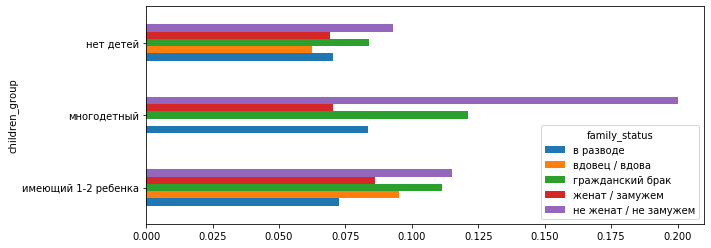

In [75]:
pivot_children_family_status.plot(figsize=(10,4), kind='barh')

Вывод: при рассмотрении более детальных данных можно сделать вывод, что наивысший риск невозврата кредита у многодетных клиентов, которые не состоят в браке. Наименьший риск также у многодетных, но в статусе вдовы/ вдовца. Высокий риск наблюдается среди многодетных клиентов в гражданском браке.

In [76]:
pivot_children_income_group = clients.pivot_table(index=['children_group'], columns='income_group', values='debt', aggfunc='mean')
pivot_children_income_group

income_group,высокий доход,низкий доход,очень высокий доход,средний доход
children_group,,,,
имеющий 1-2 ребенка,0.098632,0.094660,0.078366,0.099491
многодетный,0.084211,0.118421,0.049020,0.084112
нет детей,0.078576,0.071978,0.068406,0.082709


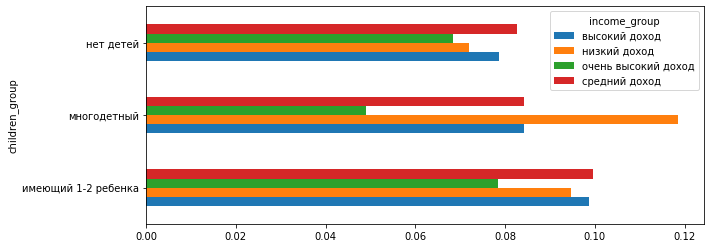

In [77]:
pivot_children_income_group.plot(figsize=(10,4), kind='barh')

Рассматривая количество детей в зависимости от уровня доходов, можно сделать вывод, что наивысший риск - у многодетных с низким доходом. Самый низкий риск - также у многодетных, но с очень высоким доходом. 

**Вывод**

Общий вывод состоит в том, что самый низкий риск невозврата кредита у группы клиентов, у которых нет детей. Самый высокий риск среди клиентов, у которых 1-2 детей, многодетные клиенты имеют средний риск невозврата кредита. При этом более детальное рассмотрение связи между количеством детей и такими показателями, как семейное положение / уровень доходов, позволяет сделать более детальные выводы.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [78]:
dependence_family_status = dependence('family_status')
dependence_family_status

,debt
family_status,
вдовец / вдова,0.065693
в разводе,0.071130
женат / замужем,0.075452
гражданский брак,0.093471
не женат / не замужем,0.097509


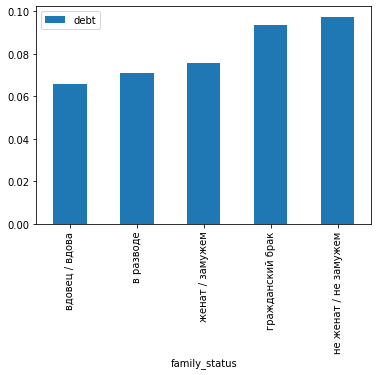

In [79]:
dependence_family_status.plot(kind='bar')

**Вывод**

Самый высокий риск невозврата кредита наблюдается у клиентов в статусе "не женат/ не замужем", самый низкий риск - у вдов и вдовцов.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [80]:
dependence_income_group = dependence('income_group')
dependence_income_group

,debt
income_group,
очень высокий доход,0.071402
низкий доход,0.079605
высокий доход,0.085382
средний доход,0.088155


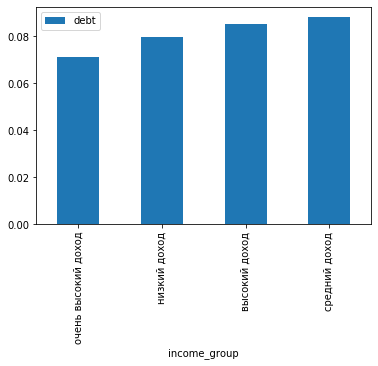

In [81]:
dependence_income_group.plot(kind='bar')

Отметим, что самый высокий риск невозврата кредита - у клиентов со средним доходом. Клиенты с очень высоким доходов возвращают как правило кредит вовремя (наименьший риск). Интересно также более детально посмотреть на тип занятости к привязке к уровню дохода.

In [82]:
pivot_income_group_type = clients.pivot_table(index=['income_group'], columns='type', values='debt', aggfunc='mean')
pivot_income_group_type

type,безработный,в декрете,госслужащий,компаньон,пенсионер,предприниматель,сотрудник,студент
income_group,,,,,,,,
высокий доход,NaN,NaN,0.048035,0.079011,0.057489,NaN,0.104049,NaN
низкий доход,1.0,1.0,0.068376,0.082777,0.047586,NaN,0.096051,0.0
очень высокий доход,0.0,NaN,0.048718,0.063622,0.060504,0.0,0.083169,NaN
средний доход,NaN,NaN,0.081395,0.079327,0.065004,NaN,0.098898,NaN


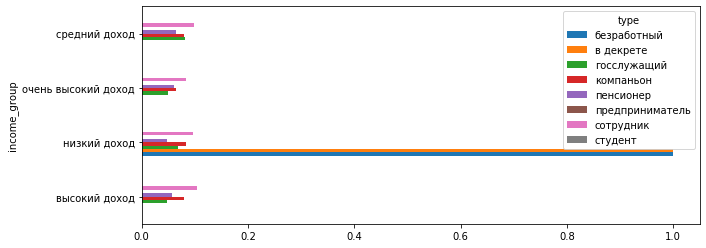

In [83]:
pivot_income_group_type.plot(figsize=(10,4), kind='barh')

**Вывод**

Итак, самый высокий риск - у клиентов с низким доходом (категории безработный, в декрете). Нет просрочек (debt = 0) у клиентов с очень высоким доходом (тип безработный, предприниматель). 

- Как разные цели кредита влияют на его возврат в срок?

In [84]:
dependence_purpose_group = dependence('purpose_group')
dependence_purpose_group

,debt
purpose_group,
жилье,0.069058
недвижимость,0.074634
свадьба,0.080034
образование,0.092200
автомобиль,0.093590


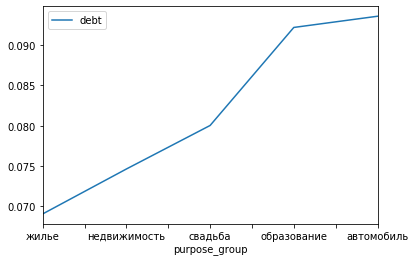

In [85]:
dependence_purpose_group.plot()

**Вывод**

Самый высокий риск невозврата кредита - у клиентов, которые берут его с целью купить автомобиль. Наиболее надежные заемщики, - клиенты, которые покупают жилье в кредит (ипотека), здесь почти нет задолженностей.

## Шаг 4. Общий вывод

В целом, можно сделать вывод, что ответы на поставленные в исследовании цели были найдены. В результате было выявлено следующее:
 * существует зависимость между количеством детей и вероятностью выплатить кредит в срок (клиенты без детей обычно выплачивают кредит без задолженности
 * самый высокий риск невозврата кредита наблюдается у клиентов в статусе "не женат/ не замужем", самый низкий риск - у вдов и вдовцов.
 * самый высокий риск - у клиентов с низким доходом (категории безработный, в декрете). Нет просрочек (debt = 0) у клиентов с очень высоким доходом (тип безработный, предприниматель).
 * самый высокий риск невозврата кредита - у клиентов, которые берут его с целью купить автомобиль. Наиболее надежные заемщики, - клиенты, которые покупают жилье в кредит (ипотека), здесь почти нет задолженностей.
    